# Home Credit Default Risk

In [48]:
import numpy as np
import pandas as pd 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
#ファイルの読み込み
path = "/Users/owner/GCI/Final_Assignment/"

df = pd.read_csv(path + 'application_train.csv')
df_test = pd.read_csv(path + 'application_test.csv')

In [50]:
#トレーニングデータのサイズ
print('Training data shape: ', df.shape)
df.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
#欠損値の確認
df.isnull().sum().head(15)

SK_ID_CURR                0
TARGET                    0
NAME_CONTRACT_TYPE        0
CODE_GENDER               0
FLAG_OWN_CAR              0
FLAG_OWN_REALTY           0
CNT_CHILDREN              0
AMT_INCOME_TOTAL          0
AMT_CREDIT                0
AMT_ANNUITY              12
AMT_GOODS_PRICE         278
NAME_TYPE_SUITE        1292
NAME_INCOME_TYPE          0
NAME_EDUCATION_TYPE       0
NAME_FAMILY_STATUS        0
dtype: int64

In [52]:
df['CREDIT PER PRICE'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df = df.dropna(subset=['CREDIT PER PRICE'])
df['CREDIT PER PRICE'].isnull().sum()

0

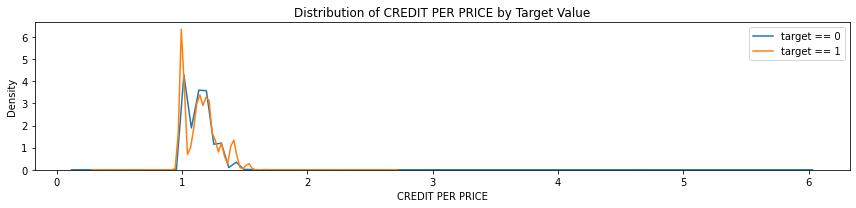

In [53]:
plt.figure(figsize = (12, 3))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'CREDIT PER PRICE'], label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'CREDIT PER PRICE'], label = 'target == 1')

plt.title('Distribution of CREDIT PER PRICE by Target Value')
plt.xlabel('CREDIT PER PRICE'); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

In [54]:
df['CREDIT PER ANNUITY'] = df['AMT_CREDIT'] / df['AMT_ANNUITY']
df = df.dropna(subset=['CREDIT PER ANNUITY'])
df['CREDIT PER ANNUITY'].isnull().sum()

0

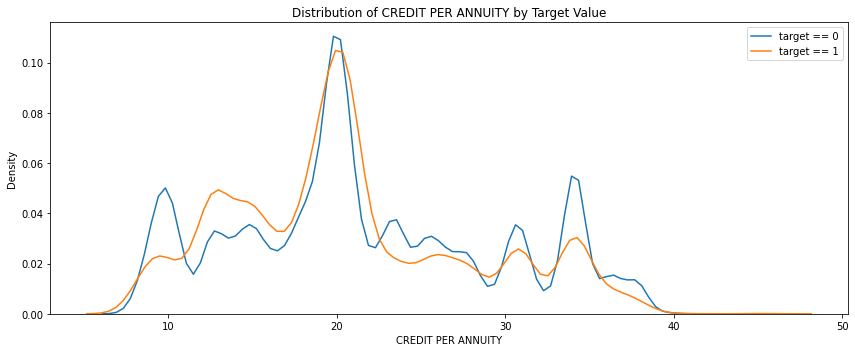

In [55]:
plt.figure(figsize = (12, 5))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'CREDIT PER ANNUITY'], label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'CREDIT PER ANNUITY'], label = 'target == 1')

plt.title('Distribution of CREDIT PER ANNUITY by Target Value')
plt.xlabel('CREDIT PER ANNUITY'); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

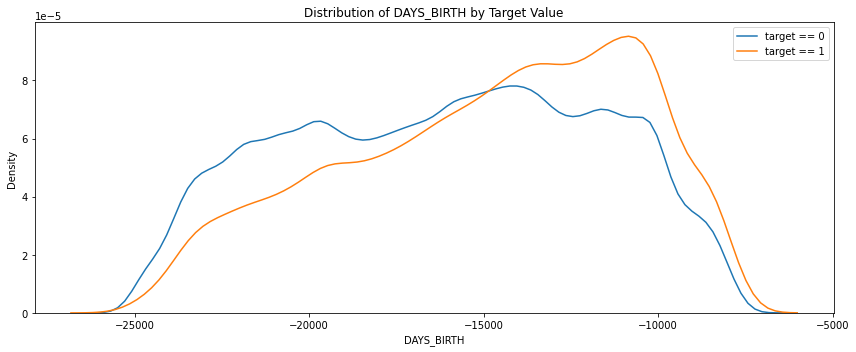

In [56]:
plt.figure(figsize = (12, 5))

sns.kdeplot(df.loc[df['TARGET'] == 0, 'DAYS_BIRTH'], label = 'target == 0')
sns.kdeplot(df.loc[df['TARGET'] == 1, 'DAYS_BIRTH'], label = 'target == 1')

plt.title('Distribution of DAYS_BIRTH by Target Value')
plt.xlabel('DAYS_BIRTH'); plt.ylabel('Density');

plt.tight_layout(h_pad = 2.5)

In [57]:
df_0 = df[df['TARGET'] == 0]
df_1 = df[df['TARGET'] == 1]

In [58]:
#利益 = 返済額 - 住宅価格
df_0['margin'] = df_0['AMT_CREDIT'] - df_0['AMT_GOODS_PRICE']
profit = df_0['margin'].sum()
print(profit)

17002447452.0


In [59]:
#デフォルトコスト
loss = df_1['AMT_CREDIT'].sum()
print(loss)

13841609449.5


In [60]:
#収益
gain = profit - loss
print(gain)

3160838002.5


In [61]:
#一人当たり収益
print(gain / df.shape[0])

10288.482891794507


In [62]:
#顧客数
df.shape[0]

307221

In [63]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le_count = 0

#Columnごとに繰り返し
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            df_test[col] = le.transform(df_test[col])

            # Keep track of how many columns were label encoded
            le_count += 1

In [64]:
#異常値のフラグ
df['DAYS_EMPLOYED_ANOM'] = df["DAYS_EMPLOYED"] == 365243
#異常値をnanで置き換え
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

df_test['DAYS_EMPLOYED_ANOM'] = df_test["DAYS_EMPLOYED"] == 365243
df_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

In [65]:
#特徴量作成
df['RATE_CREDIT'] = df['AMT_CREDIT'].div(df.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT'] = df_test['AMT_CREDIT'].div(df_test.groupby('OCCUPATION_TYPE')['AMT_CREDIT'].transform('mean'))

df['RATE_INCOME_TOTAL'] = df['AMT_INCOME_TOTAL'].div(df.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))
df_test['RATE_INCOME_TOTAL'] = df_test['AMT_INCOME_TOTAL'].div(df_test.groupby('OCCUPATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))

df['RATE_CREDIT_HOUSING'] = df['AMT_CREDIT'].div(df.groupby('NAME_HOUSING_TYPE')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT_HOUSING'] = df_test['AMT_CREDIT'].div(df_test.groupby('NAME_HOUSING_TYPE')['AMT_CREDIT'].transform('mean'))

df['RATE_INCOME_ORGANIZATION'] = df['AMT_INCOME_TOTAL'].div(df.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))
df_test['RATE_INCOME_ORGANIZATION'] = df_test['AMT_INCOME_TOTAL'].div(df_test.groupby('ORGANIZATION_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))

df['RATE_REGION_SUITE'] = df['REGION_RATING_CLIENT'].div(df.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT'].transform('mean'))
df_test['RATE_REGION_SUITE'] = df_test['REGION_RATING_CLIENT'].div(df_test.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT'].transform('mean'))

df['RATE_REGION_W_CITY_SUITE'] = df['REGION_RATING_CLIENT_W_CITY'].div(df.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT_W_CITY'].transform('mean'))
df_test['RATE_REGION_W_CITY_SUITE'] = df_test['REGION_RATING_CLIENT_W_CITY'].div(df_test.groupby('NAME_TYPE_SUITE')['REGION_RATING_CLIENT_W_CITY'].transform('mean'))

df['RATE_CREDIT_FAMILY'] = df['AMT_CREDIT'].div(df.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT_FAMILY'] = df_test['AMT_CREDIT'].div(df_test.groupby('NAME_FAMILY_STATUS')['AMT_CREDIT'].transform('mean'))

df['RATE_CREDIT_CONTRACT'] = df['AMT_CREDIT'].div(df.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].transform('mean'))
df_test['RATE_CREDIT_CONTRACT'] = df_test['AMT_CREDIT'].div(df_test.groupby('NAME_CONTRACT_TYPE')['AMT_CREDIT'].transform('mean'))

df['RATE_INCOME_CONTRACT'] = df['AMT_INCOME_TOTAL'].div(df.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))
df_test['RATE_INCOME_CONTRACT'] = df_test['AMT_INCOME_TOTAL'].div(df_test.groupby('NAME_CONTRACT_TYPE')['AMT_INCOME_TOTAL'].transform('mean'))



df['INCOME_PER_FAMILY'] = df['AMT_INCOME_TOTAL'] / df['CNT_FAM_MEMBERS']
df_test['INCOME_PER_FAMILY'] = df_test['AMT_INCOME_TOTAL'] / df_test['CNT_FAM_MEMBERS']

df['CREDIT_PER_INCOME'] = df['AMT_CREDIT'] / df['AMT_INCOME_TOTAL']
df_test['CREDIT_PER_INCOME'] = df_test['AMT_CREDIT'] / df_test['AMT_INCOME_TOTAL']

df['EXT_SOURCE_1 PER DAYS_BIRTH'] = df['EXT_SOURCE_1'] / df['DAYS_BIRTH']
df_test['EXT_SOURCE_1 PER DAYS_BIRTH'] = df_test['EXT_SOURCE_1'] / df_test['DAYS_BIRTH']

df['REGION_RATING_CLIENT PER REGION_POPULATION_RELATIVE'] = df['REGION_RATING_CLIENT'] / df['REGION_POPULATION_RELATIVE']
df_test['REGION_RATING_CLIENT PER REGION_POPULATION_RELATIVE'] = df_test['REGION_RATING_CLIENT'] / df_test['REGION_POPULATION_RELATIVE']

df['EXT_SOURCE_1 PER DAYS_BIRTH'] = df['EXT_SOURCE_1'] / df['DAYS_BIRTH']
df_test['EXT_SOURCE_1 PER DAYS_BIRTH'] = df_test['EXT_SOURCE_1'] / df_test['DAYS_BIRTH']

df['C G'] = df['AMT_CREDIT'] / df['AMT_GOODS_PRICE']
df_test['C G'] = df_test['AMT_CREDIT'] / df_test['AMT_GOODS_PRICE']
df['A G'] = df['AMT_ANNUITY'] / df['AMT_GOODS_PRICE']
df_test['A G'] = df_test['AMT_ANNUITY'] / df_test['AMT_GOODS_PRICE']

df['DAYS_REGISTRATION / DAYS_BIRTH'] = df['DAYS_REGISTRATION'] / df['DAYS_BIRTH']
df_test['DAYS_REGISTRATION / DAYS_BIRTH'] = df_test['DAYS_REGISTRATION'] / df_test['DAYS_BIRTH']

df['OWN_CAR_AGE / DAYS_BIRTH'] = df['OWN_CAR_AGE'] / df['DAYS_BIRTH']
df_test['OWN_CAR_AGE / DAYS_BIRTH'] = df_test['OWN_CAR_AGE'] / df_test['DAYS_BIRTH']

df['CNT_CHILDREN / CNT_FAM_MEMBERS'] = df['CNT_CHILDREN'] / df['CNT_FAM_MEMBERS']
df_test['CNT_CHILDREN / CNT_FAM_MEMBERS'] = df_test['CNT_CHILDREN'] / df_test['CNT_FAM_MEMBERS']

df['DAYS_ID_PUBLISH / DAYS_BIRTH'] = df['DAYS_ID_PUBLISH'] / df['DAYS_BIRTH']
df_test['DAYS_ID_PUBLISH / DAYS_BIRTH'] = df_test['DAYS_ID_PUBLISH'] / df_test['DAYS_BIRTH']

df['EXT_SOURCE_1 DAYS_EMPLOYED'] = df['EXT_SOURCE_1'] * df['DAYS_EMPLOYED']
df_test['EXT_SOURCE_1 DAYS_EMPLOYED'] = df_test['EXT_SOURCE_1'] * df_test['DAYS_EMPLOYED']

df['CNT_CHILDREN / DAYS_EMPLOYED'] = df['CNT_CHILDREN'] / df['DAYS_EMPLOYED']
df_test['CNT_CHILDREN / DAYS_EMPLOYED'] = df_test['CNT_CHILDREN'] / df_test['DAYS_EMPLOYED']

df['DAYS_EMPLOYED REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY'] = df['DAYS_EMPLOYED'] * df['REG_CITY_NOT_LIVE_CITY'] * df['REG_CITY_NOT_WORK_CITY']
df_test['DAYS_EMPLOYED REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY'] = df_test['DAYS_EMPLOYED'] * df_test['REG_CITY_NOT_LIVE_CITY'] * df_test['REG_CITY_NOT_WORK_CITY']

df['DAYS_EMPLOYED_PERCENT'] = df['DAYS_EMPLOYED'] / df['DAYS_BIRTH']
df_test['DAYS_EMPLOYED_PERCENT'] = df_test['DAYS_EMPLOYED'] / df_test['DAYS_BIRTH']


df['EXT_SOURCE_1 FLAG_EMP_PHONE'] = df['EXT_SOURCE_1'] * df['FLAG_EMP_PHONE']
df_test['EXT_SOURCE_1 FLAG_EMP_PHONE'] = df_test['EXT_SOURCE_1'] * df_test['FLAG_EMP_PHONE']

df['EXT_SOURCE_2 REGION_RATING_CLIENT'] = df['EXT_SOURCE_2'] * df['REGION_RATING_CLIENT']
df_test['EXT_SOURCE_2 REGION_RATING_CLIENT'] = df_test['EXT_SOURCE_2'] * df_test['REGION_RATING_CLIENT']

df['EXT_SOURCE_1 DAYS_LAST_PHONE_CHANGE'] = df['EXT_SOURCE_1'] * df['DAYS_LAST_PHONE_CHANGE']
df_test['EXT_SOURCE_1 DAYS_LAST_PHONE_CHANGE'] = df_test['EXT_SOURCE_1'] * df_test['DAYS_LAST_PHONE_CHANGE']

df['EXT_SOURCE_2 DAYS_LAST_PHONE_CHANGE'] = df['EXT_SOURCE_2'] * df['DAYS_LAST_PHONE_CHANGE']
df_test['EXT_SOURCE_2 DAYS_LAST_PHONE_CHANGE'] = df_test['EXT_SOURCE_2'] * df_test['DAYS_LAST_PHONE_CHANGE']


df['EXT_SOURCE_2 PER REGION_RATING_CLIENT'] = df['EXT_SOURCE_2'] / df['REGION_RATING_CLIENT']
df_test['EXT_SOURCE_2 PER REGION_RATING_CLIENT'] = df_test['EXT_SOURCE_2'] / df_test['REGION_RATING_CLIENT']

df['EXT_SOURCE_2 PER DAYS_LAST_PHONE_CHANGE'] = df['EXT_SOURCE_2'] / df['DAYS_LAST_PHONE_CHANGE']
df_test['EXT_SOURCE_2 PER DAYS_LAST_PHONE_CHANGE'] = df_test['EXT_SOURCE_2'] / df_test['DAYS_LAST_PHONE_CHANGE']

df['ANNUITY_PER_INCOME'] = df['AMT_ANNUITY'] / df['AMT_INCOME_TOTAL']
df_test['ANNUITY_PER_INCOME'] = df_test['AMT_ANNUITY'] / df_test['AMT_INCOME_TOTAL']

df['EXT_SOURCE_2 EXT_SOURCE_3'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3']
df_test['EXT_SOURCE_2 EXT_SOURCE_3'] = df_test['EXT_SOURCE_2'] * df_test['EXT_SOURCE_3']

df['EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH'] = df['EXT_SOURCE_2'] * df['EXT_SOURCE_3'] * df['DAYS_BIRTH']
df_test['EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH'] = df_test['EXT_SOURCE_2'] * df_test['EXT_SOURCE_3'] * df_test['DAYS_BIRTH']

df['PAYMENT_RATE'] = df['AMT_ANNUITY'] / df['AMT_CREDIT']
df_test['PAYMENT_RATE'] = df_test['AMT_ANNUITY'] / df_test['AMT_CREDIT']

In [66]:
#カテゴリカル変数をOneHotEncoding
df = pd.get_dummies(df)
df_test = pd.get_dummies(df_test)

In [67]:
train_labels = df['TARGET']

#トレーニング/テストデータのアライン
df, df_test = df.align(df_test, join = 'inner', axis = 1)

#ターゲットを元に戻す
df['TARGET'] = train_labels

In [68]:
df.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df.columns]
df_test.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_test.columns]

In [69]:
#機械学習ライブラリのインポート
from sklearn.model_selection import KFold
import lightgbm as lgb
import optuna

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [70]:
X = df.drop('TARGET', axis = 1)
y = df['TARGET']

X, X_test, y, y_test = train_test_split(X, y)

Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[799]	valid_0's auc: 0.771756
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[588]	valid_0's auc: 0.766366
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[548]	valid_0's auc: 0.76536
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[559]	valid_0's auc: 0.756754
Training until validation scores don't improve for 200 rounds
Early stopping, best iteration is:
[832]	valid_0's auc: 0.76784


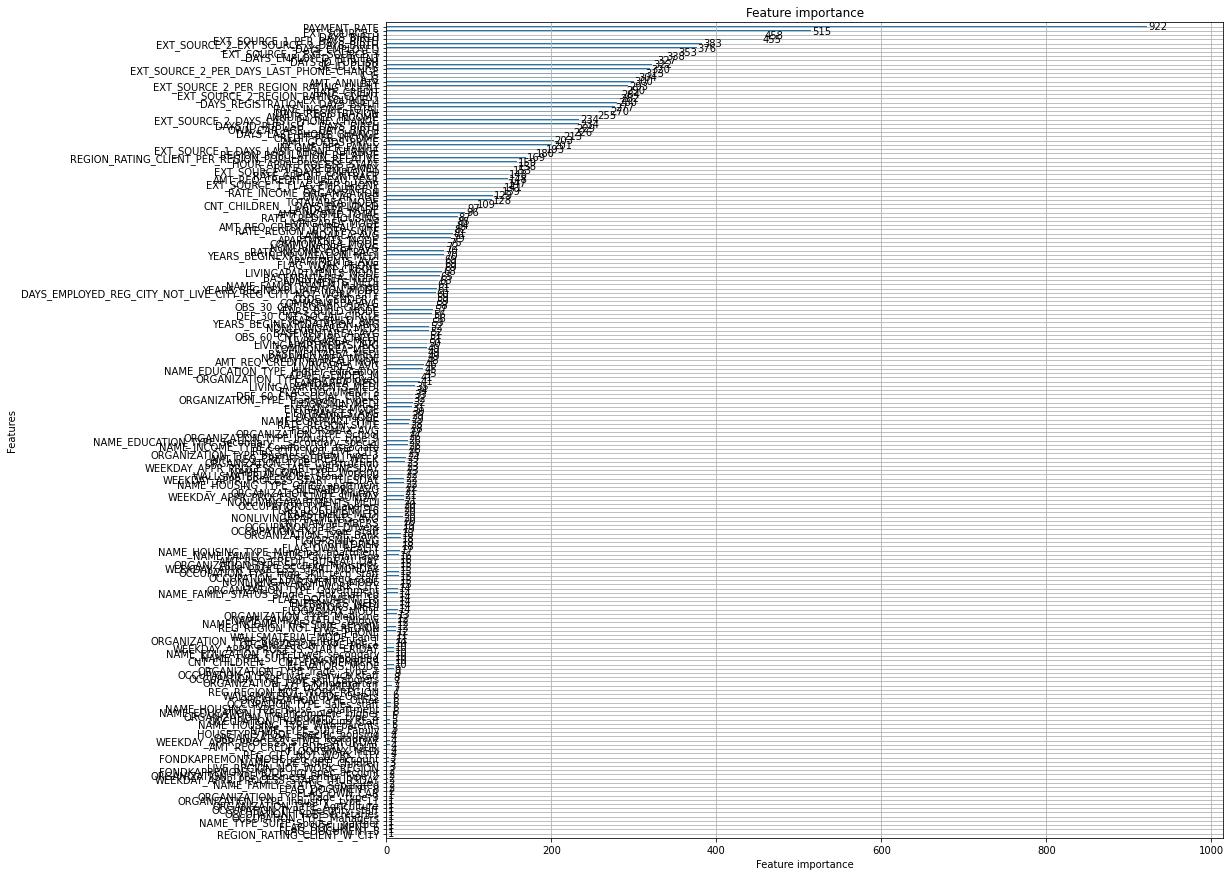

0.7656152340603924


In [71]:
#5分割交差検証
kf = KFold(n_splits=5, shuffle=True, random_state=71)

scores = []

for tr_idx, va_idx in kf.split(X):
    X_train, X_val = X.iloc[tr_idx], X.iloc[va_idx]
    y_train, y_val = y.iloc[tr_idx], y.iloc[va_idx]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_val, y_val, reference=lgb_train)
    
    lgbm_params = {
        # 二値分類問題
        'objective': 'binary',
        # AUC の最大化を目指す
        'metric': 'auc',
        'learning_rate': 0.03950108314757622,
        'max_bin': 300,
        'max_depth': 8,
        'num_leaves': 20,
        'colsample_bytree': 0.9040000595576059,
        'reg_alpha': 0.03983607378840796,
        'reg_lambda': 0.07189855481306354,
        'min_split_gain': 0.027194989716137527,
        'min_child_weight':38,

    }
    
    #LightGBMで学習
    model = lgb.train(lgbm_params, lgb_train, valid_sets=lgb_eval, num_boost_round=1500, early_stopping_rounds=200, verbose_eval=-1)

    y_pred = model.predict(X_val, num_iteration=model.best_iteration)
    fpr, tpr, thresholds = metrics.roc_curve(y_val, y_pred)
    auc = metrics.auc(fpr, tpr)
    scores.append(auc)
    
# 特徴量の重要度をプロットする
lgb.plot_importance(model, figsize=(15, 15))
plt.show()

print(np.mean(scores))

In [72]:
#予測
predictions = model.predict(X_test)
SK_ID_CURR = X_test['SK_ID_CURR']

#IDと予測結果の結合
Submission = pd.DataFrame({ 'SK_ID_CURR': SK_ID_CURR,'PREDICT': predictions})
Submission['TARGET'] = y_test

#収益性算出のために、返済額と住宅価格の項を追加
Submission['AMT_CREDIT'] = X_test['AMT_CREDIT']
Submission['AMT_GOODS_PRICE'] = X_test['AMT_GOODS_PRICE']

In [73]:
Submission.head(15)

,SK_ID_CURR,PREDICT,TARGET,AMT_CREDIT,AMT_GOODS_PRICE
82933,196184,0.024088,0,855000.0,855000.0
124967,244924,0.084899,0,255960.0,202500.0
248647,387672,0.100480,0,1762110.0,1575000.0
158151,283346,0.075005,0,142200.0,112500.0
40015,146352,0.039546,0,990000.0,990000.0
19437,122669,0.111688,0,1546020.0,1350000.0
186846,316609,0.026217,0,343377.0,283500.0
292957,439393,0.093673,0,1288363.5,1093500.0
133366,254683,0.020664,0,1255680.0,1125000.0
246563,385356,0.078410,0,291915.0,252000.0


In [74]:
#閾値に伴う利益の変化
threshold = np.arange(0, 1, 0.01)
gain_list = []
for i in threshold:
    Submission['PREDICT_BINARY'] = 0
    Submission.loc[Submission['PREDICT'] > i, 'PREDICT_BINARY'] = 1
    
    Submission['TP'] = 0
    Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 1)), 'TP'] = 1
    
    Submission['FP'] = 0
    Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 1)), 'FP'] = 1
    
    Submission['TN'] = 0
    Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 0)), 'TN'] = 1
    
    Submission['FN'] = 0
    Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 0)), 'FN'] = 1
    
    Sub_0 = Submission[Submission['TN'] == 1]
    Sub_1 = Submission[Submission['FN'] == 1]
    
    Sub_0['margin'] = Sub_0['AMT_CREDIT'] - Sub_0['AMT_GOODS_PRICE']
    
    profit_sub = Sub_0['margin'].sum()
    
    loss_sub = Sub_1['AMT_CREDIT'].sum()
    
    gain_sub = profit_sub - loss_sub
    gain_list.append(gain_sub)

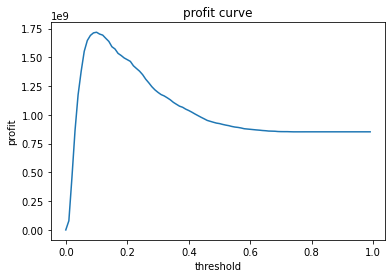

In [75]:
#利益曲線
plt.plot(threshold, gain_list)
plt.title("profit curve")
plt.xlabel("threshold")
plt.ylabel("profit")
plt.show()

In [76]:
#利益最大となる閾値
print(threshold[np.argmax(gain_list)])

0.1


In [85]:
#確率が閾値を超えた場合に陽性判定する
Submission['PREDICT_BINARY'] = 0
Submission.loc[Submission['PREDICT'] > 0.1, 'PREDICT_BINARY'] = 1
Submission.head(15)

,SK_ID_CURR,PREDICT,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,PREDICT_BINARY,TP,FP,TN,FN
82933,196184,0.024088,0,855000.0,855000.0,0,0,0,1,0
124967,244924,0.084899,0,255960.0,202500.0,0,0,0,1,0
248647,387672,0.100480,0,1762110.0,1575000.0,1,0,1,0,0
158151,283346,0.075005,0,142200.0,112500.0,0,0,0,1,0
40015,146352,0.039546,0,990000.0,990000.0,0,0,0,1,0
19437,122669,0.111688,0,1546020.0,1350000.0,1,0,1,0,0
186846,316609,0.026217,0,343377.0,283500.0,0,0,0,1,0
292957,439393,0.093673,0,1288363.5,1093500.0,0,0,1,0,0
133366,254683,0.020664,0,1255680.0,1125000.0,0,0,0,1,0
246563,385356,0.078410,0,291915.0,252000.0,0,0,0,1,0


In [86]:
#真陽性、偽陽性、真陰性、偽陰性
Submission['TP'] = 0
Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 1)), 'TP'] = 1

Submission['FP'] = 0
Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 1)), 'FP'] = 1

Submission['TN'] = 0
Submission.loc[((Submission['TARGET'] == 0) & (Submission['PREDICT_BINARY'] == 0)), 'TN'] = 1

Submission['FN'] = 0
Submission.loc[((Submission['TARGET'] == 1) & (Submission['PREDICT_BINARY'] == 0)), 'FN'] = 1

Submission.head(15)

,SK_ID_CURR,PREDICT,TARGET,AMT_CREDIT,AMT_GOODS_PRICE,PREDICT_BINARY,TP,FP,TN,FN
82933,196184,0.024088,0,855000.0,855000.0,0,0,0,1,0
124967,244924,0.084899,0,255960.0,202500.0,0,0,0,1,0
248647,387672,0.100480,0,1762110.0,1575000.0,1,0,1,0,0
158151,283346,0.075005,0,142200.0,112500.0,0,0,0,1,0
40015,146352,0.039546,0,990000.0,990000.0,0,0,0,1,0
19437,122669,0.111688,0,1546020.0,1350000.0,1,0,1,0,0
186846,316609,0.026217,0,343377.0,283500.0,0,0,0,1,0
292957,439393,0.093673,0,1288363.5,1093500.0,0,0,0,1,0
133366,254683,0.020664,0,1255680.0,1125000.0,0,0,0,1,0
246563,385356,0.078410,0,291915.0,252000.0,0,0,0,1,0


In [87]:
#混同行列
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Submission['TARGET'], Submission['PREDICT_BINARY'])
print(cm)

[[55014 15665]
 [ 2393  3734]]


In [88]:
#True Positive Rate
TPR = cm[1][1] / (cm[1][1] + cm[1][0])
print(TPR)

0.6094336543169577


In [89]:
#False Positive Rate
FPR = cm[0][1] / (cm[0][1] + cm[0][0])
print(FPR)

0.221635846573947


In [90]:
#TN：融資して返済もされる(利益)
#FN：融資するが返済されない(コスト)
Sub_0 = Submission[Submission['TN'] == 1]
Sub_1 = Submission[Submission['FN'] == 1]

#利益 = 返済額 - 住宅価格
Sub_0['margin'] = Sub_0['AMT_CREDIT'] - Sub_0['AMT_GOODS_PRICE']
profit_sub = Sub_0['margin'].sum()
print(profit_sub)

#FNによるデフォルトコスト
loss_sub = Sub_1['AMT_CREDIT'].sum()
print(loss_sub)

#収益 = (返済額 - 住宅価格) - デフォルトコスト
gain_sub = profit_sub - loss_sub
print(gain_sub)

3145015876.5
1426439020.5
1718576856.0


In [91]:
#一人当たり収益
print(gain_sub / (Sub_0.shape[0] + Sub_1.shape[0]))

29936.71252634696


In [92]:
print(Sub_0.shape[0] + Sub_1.shape[0])

57407


# 収益性について

もともと307221人の顧客に融資し、一人当たり利益は10288ドルだった。

機械学習によりデフォルト確率の低い57407人に融資することで、結果として一人当たり利益を約3倍の29936ドルに増やすことができた。

これを元に新事業の提案を行った。具体的な内容はリンク先のスライドを見て頂きたい。
https://www.slideshare.net/KitadaAtsuya/gci-238455344